In [1]:
#iris
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
library(randomForest)
iris.rf = randomForest(Species~., data = iris)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [7]:
iris.rf
# error rate: 4%

#항아리에서 1번부터 10번까지의 공을 복원 추출할 때...
#68%가 추출, 32%은 모델링 시 사용되지 않음

summary(iris.rf)


Call:
 randomForest(formula = Species ~ ., data = iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted        150   factor numeric  
err.rate        2000   -none- numeric  
confusion         12   -none- numeric  
votes            450   matrix numeric  
oob.times        150   -none- numeric  
classes            3   -none- character
importance         4   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                150   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [12]:
#rf는 split시 일부를 지정하여 할 수 있음.
iris.bg = randomForest(Species~., data = iris, mtry = 4) #설명변수 4개를 모두 사용
iris.bg # split이 4번 이루어짐


Call:
 randomForest(formula = Species ~ ., data = iris, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06

In [15]:
#iris로 tree 해보기
library(rpart)
iris.rpart = rpart(Species ~ ., data = iris)
summary(iris.rpart)

Call:
rpart(formula = Species ~ ., data = iris)
  n= 150 

    CP nsplit rel error xerror       xstd
1 0.50      0      1.00   1.15 0.05180090
2 0.44      1      0.50   0.66 0.06079474
3 0.01      2      0.06   0.11 0.03192700

Variable importance
 Petal.Width Petal.Length Sepal.Length  Sepal.Width 
          34           31           21           14 

Node number 1: 150 observations,    complexity param=0.5
  predicted class=setosa      expected loss=0.6666667  P(node) =1
    class counts:    50    50    50
   probabilities: 0.333 0.333 0.333 
  left son=2 (50 obs) right son=3 (100 obs)
  Primary splits:
      Petal.Length < 2.45 to the left,  improve=50.00000, (0 missing)
      Petal.Width  < 0.8  to the left,  improve=50.00000, (0 missing)
      Sepal.Length < 5.45 to the left,  improve=34.16405, (0 missing)
      Sepal.Width  < 3.35 to the right, improve=19.03851, (0 missing)
  Surrogate splits:
      Petal.Width  < 0.8  to the left,  agree=1.000, adj=1.00, (0 split)
      Sepal.Le

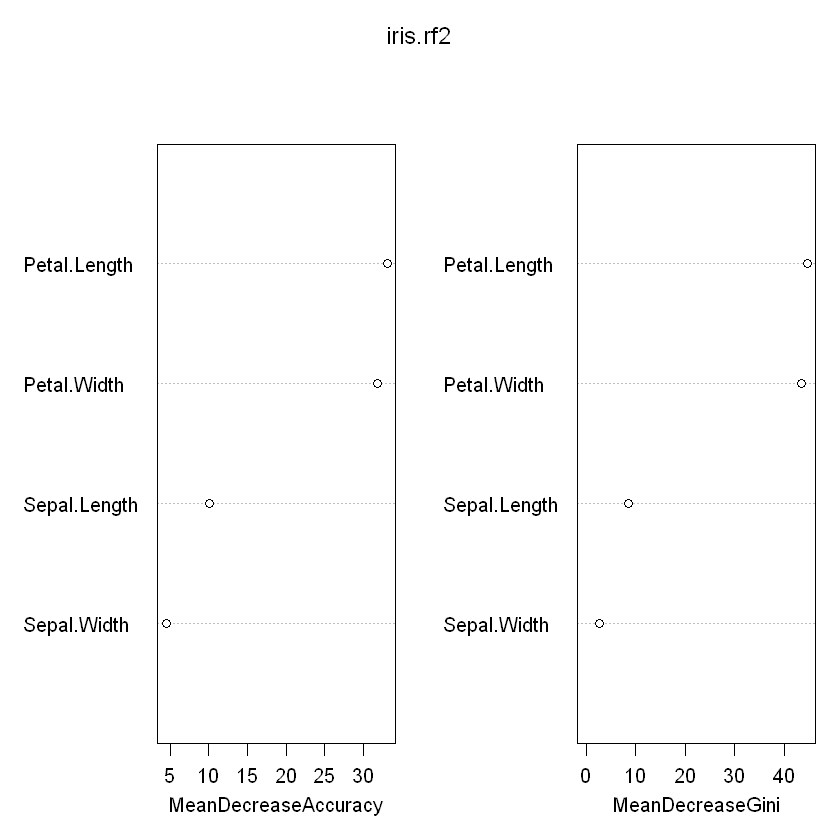

In [19]:
iris.rf2 = randomForest(Species ~ ., data = iris, importance = T)
varImpPlot(iris.rf2)
#어떤 변수가 가장 중요한지에 대한 결과를 제공
#Petal 변수가 Sepal 변수보다 더 중요하다고 보여짐 
#RF를 통해 variable importance를 판별, 선택과 집중을 할 수 있도록 도와줌

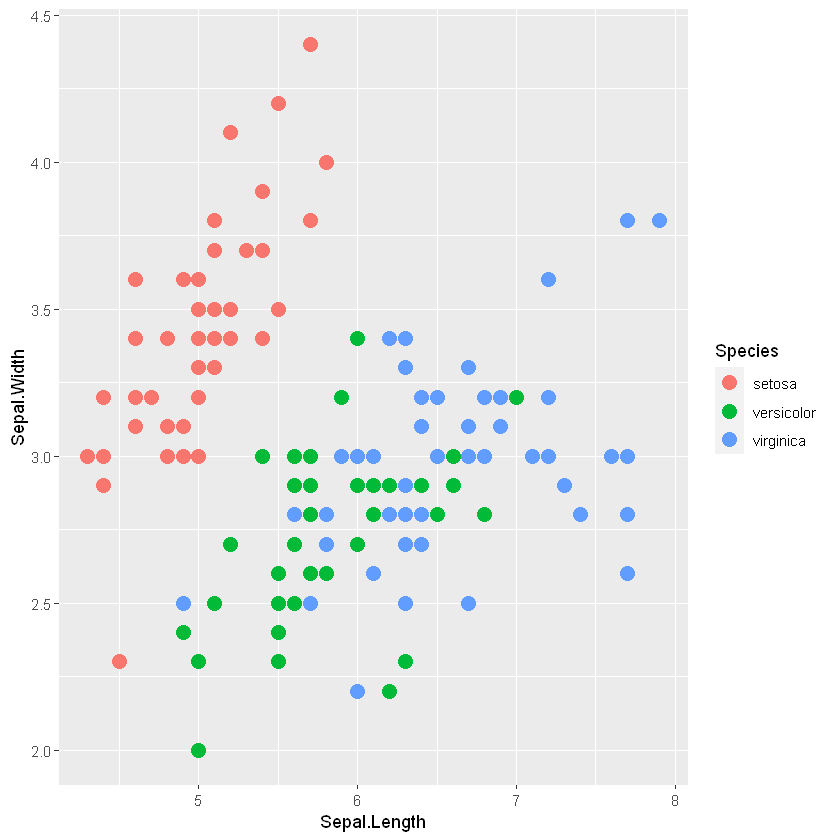

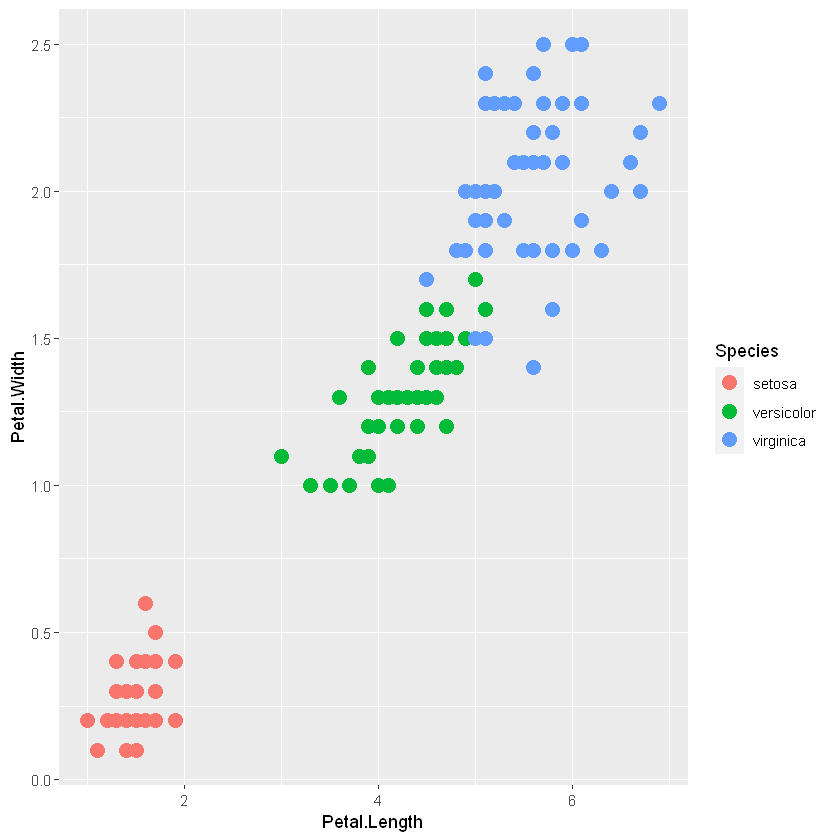

In [21]:
library(ggplot2)
ggplot(aes(Sepal.Length, Sepal.Width), data = iris) + geom_point(aes(color = Species), size = 4)
ggplot(aes(Petal.Length, Petal.Width), data = iris) + geom_point(aes(color = Species), size = 4)

In [26]:
#boston housing
library(MASS)
data(Boston)
str(Boston)
summary(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

                Length Class  Mode     
call              4    -none- call     
type              1    -none- character
predicted       506    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       506    -none- numeric  
importance       26    -none- numeric  
importanceSD     13    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               506    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     


Call:
 randomForest(formula = medv ~ ., data = Boston, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 10.24577
                    % Var explained: 87.86

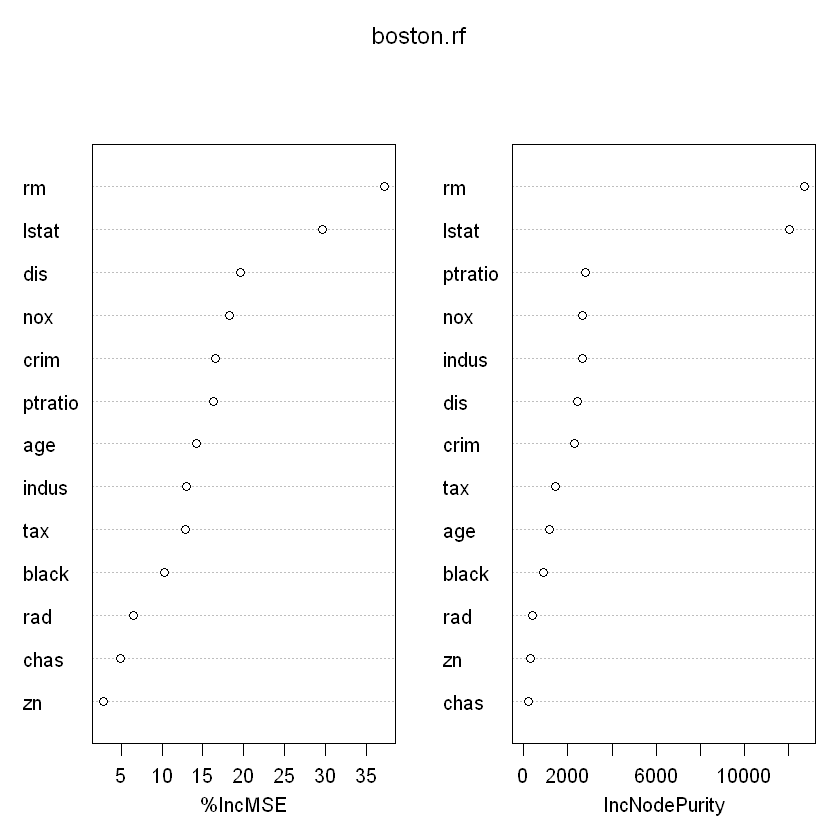

In [30]:
boston.rf = randomForest(medv ~ ., data = Boston, importance = T)
summary(boston.rf)
boston.rf #기본적으로 연속형이므로 regression으로 작동, 대개 p/3 >> 총 12개이므로 4개정도
# %Var explained >> R Square와 유사
varImpPlot(boston.rf)

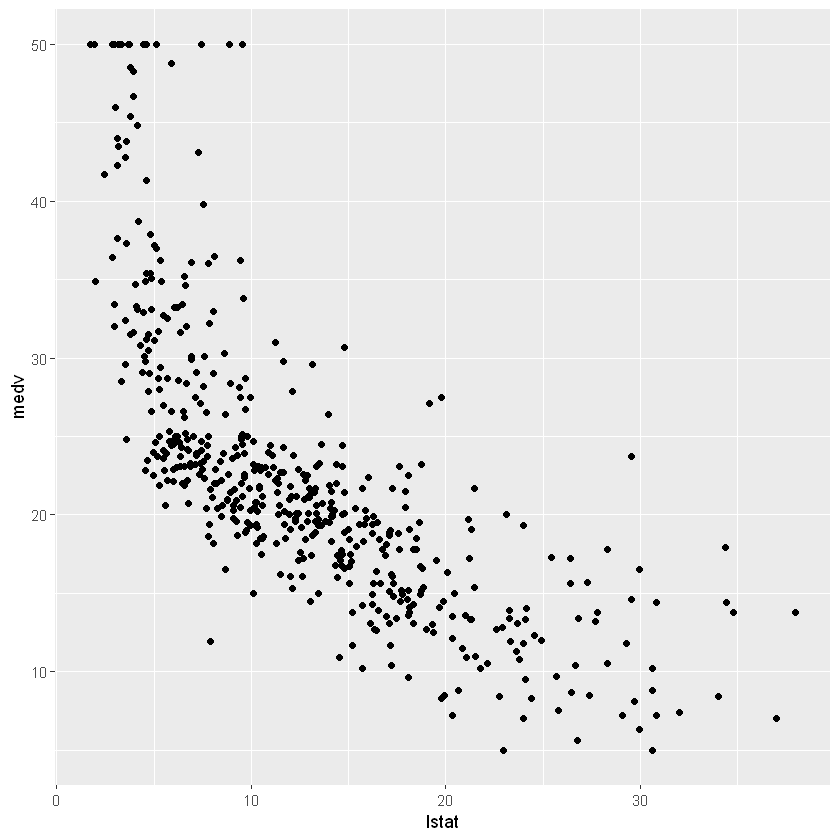

In [32]:
ggplot(aes(lstat, medv), data = Boston) + geom_point()
# quadratic relation

In [33]:
boston.lm = lm(medv ~ lstat, data = Boston)
summary(boston.lm)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16
